# Importing Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [3]:
sign_train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
sign_test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

# Exploring Data

In [4]:
sign_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
print(sign_test.shape)
print(sign_train.shape)

(7172, 785)
(27455, 785)


In [10]:
sign_train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

# Preprocessing & Modeling

In [14]:
# splitting data
inputs_train = sign_train.iloc[:, 1:].to_numpy()
targets_train = sign_train['label'].to_numpy()
inputs_test = sign_test.iloc[:, 1:].to_numpy()
targets_test = sign_test['label'].to_numpy()

In [15]:
# normalize inputs
inputs_train = inputs_train / 255.0
inputs_test = inputs_test / 255.0

Label: L


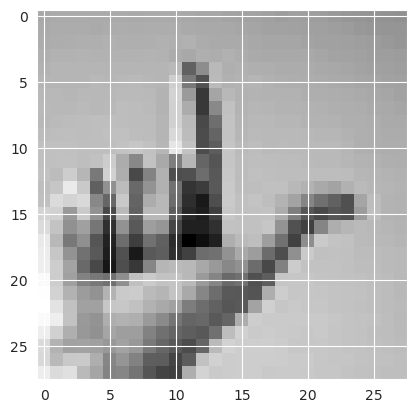

In [16]:
import string
letter = dict(enumerate(string.ascii_uppercase))

# display a random image 
img1 = np.reshape(inputs_train[668,:], (28, 28))
plt.imshow(img1, cmap='gray')
print('Label:', letter[targets_train[668]])


## logistic regression

In [17]:
# logistic regression model
model = LogisticRegression(penalty='l2',multi_class='multinomial',solver='sag')

In [18]:
model.fit(inputs_train,targets_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [19]:
print(model.score(inputs_train,targets_train))
print(model.score(inputs_test,targets_test))

0.9998543070478966
0.6979921918572225


In [20]:
pred = model.predict(inputs_test)
print('Model accuracy : {0:0.2f}'. format(accuracy_score(targets_test, pred)))

Model accuracy : 0.70


Text(0.5, 192.72222222222217, 'Predicted label')

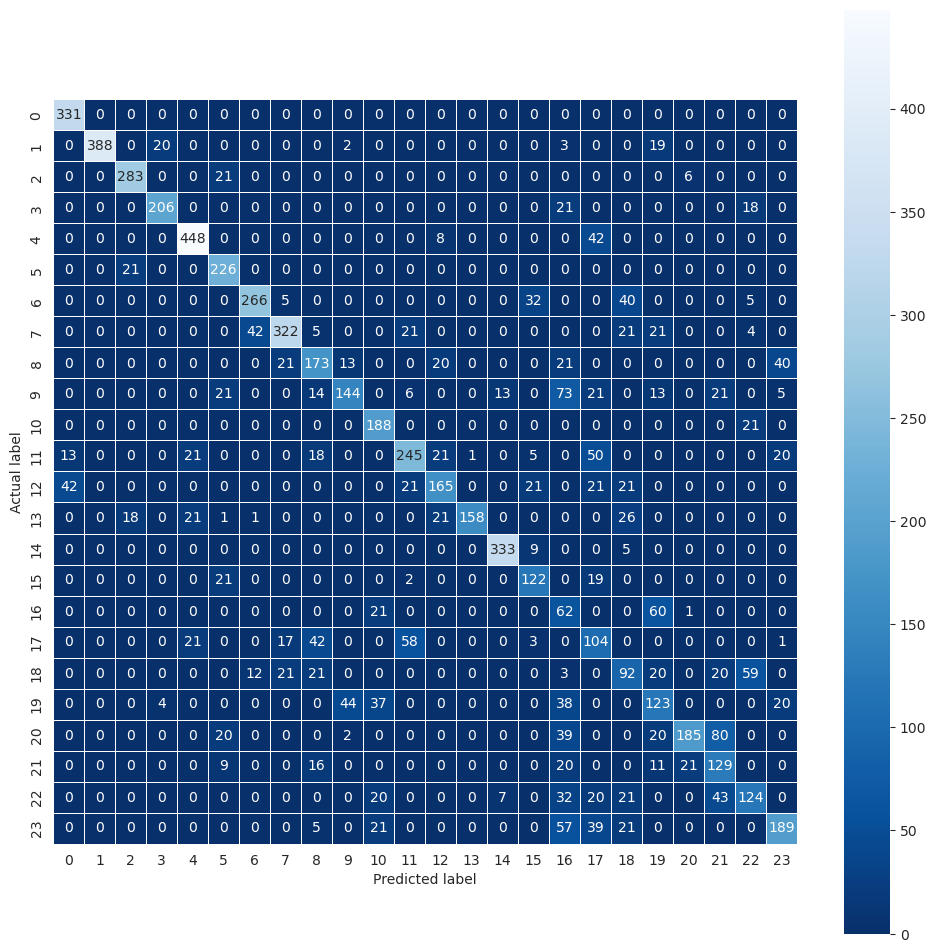

In [21]:
cm = confusion_matrix(y_true=targets_test, y_pred = pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## CNN

In [22]:
inputs_train = inputs_train.reshape(-1,28,28,1)
inputs_test = inputs_test.reshape(-1,28,28,1)

In [23]:
inputs_train.shape

(27455, 28, 28, 1)

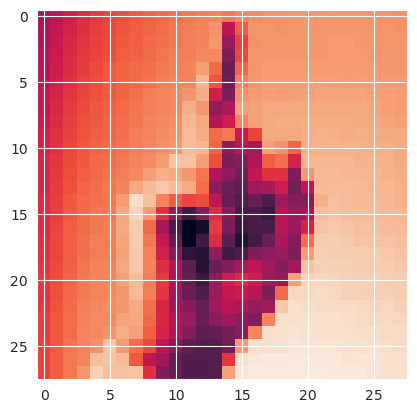

In [24]:
plt.imshow(inputs_train[0])

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten, Input, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding



In [26]:
# Encode labels to one hot vectors (ex : ب -> [....,0,1,0,0,0,0,0,0,0,0])
Y_train = to_categorical(targets_train)
Y_test = to_categorical(targets_test)

In [35]:
# Set the CNN model 

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "softmax"))

In [36]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)       

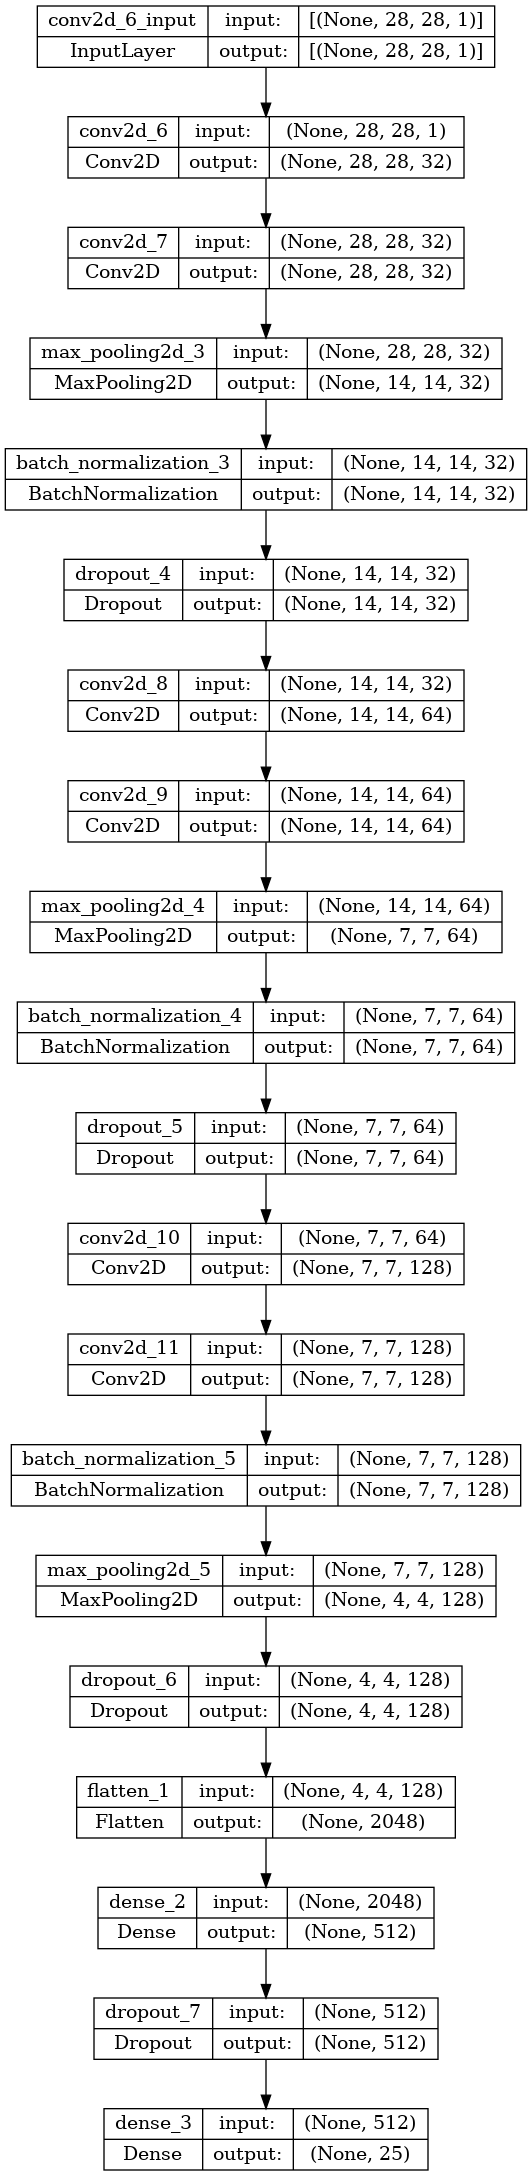

In [37]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [38]:
# Split the train and the validation set for the fitting

X_train, X_val, y_train, y_val = train_test_split(inputs_train,Y_train, test_size = 0.2, random_state=2)

In [39]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [40]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [41]:
epochs = 50
batch_size = 128


model_checkpoint_callback = ModelCheckpoint(
    filepath="best.h5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val, y_val),steps_per_epoch=X_train.shape[0] // batch_size,
                              verbose = 2,   callbacks=[model_checkpoint_callback,learning_rate_reduction,es])

Epoch 1/50


2023-03-09 20:32:35.844122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_accuracy improved from -inf to 0.03606, saving model to best.h5
171/171 - 14s - loss: 1.8765 - accuracy: 0.4409 - val_loss: 5.6900 - val_accuracy: 0.0361 - lr: 0.0010 - 14s/epoch - 84ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.03606 to 0.31961, saving model to best.h5
171/171 - 8s - loss: 0.3967 - accuracy: 0.8645 - val_loss: 4.0197 - val_accuracy: 0.3196 - lr: 0.0010 - 8s/epoch - 44ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.31961 to 0.90657, saving model to best.h5
171/171 - 7s - loss: 0.1595 - accuracy: 0.9450 - val_loss: 0.2765 - val_accuracy: 0.9066 - lr: 0.0010 - 7s/epoch - 42ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.90657 to 0.98834, saving model to best.h5
171/171 - 7s - loss: 0.1065 - accuracy: 0.9634 - val_loss: 0.0315 - val_accuracy: 0.9883 - lr: 0.0010 - 7s/epoch - 42ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.98834 to 0.99180, saving model to best.h5
171/171 - 8s - loss: 0.0772 - accuracy: 0.9753 - val

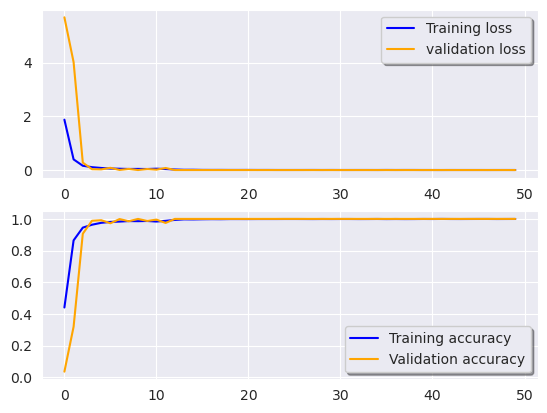

In [42]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [44]:
# evalute the model on test set
results = model.predict(inputs_test)
results

225/225 [==============================] - 1s 3ms/step


array([[2.8323842e-17, 1.8536998e-14, 1.9910856e-11, ..., 7.7886929e-18,
        6.5429637e-12, 1.6891025e-16],
       [1.7391320e-16, 6.1737226e-13, 4.0416146e-23, ..., 2.4210275e-14,
        9.1571204e-21, 1.8476945e-20],
       [2.9237946e-25, 9.3751996e-22, 1.4857064e-28, ..., 2.2003496e-15,
        3.3261688e-21, 3.0725068e-15],
       ...,
       [3.3025024e-20, 2.1017249e-25, 1.0000000e+00, ..., 3.0523494e-26,
        7.8554842e-20, 9.8604899e-23],
       [2.0164293e-15, 2.6533008e-13, 4.2445452e-19, ..., 1.7149740e-23,
        1.6944407e-20, 8.3924565e-25],
       [2.1441072e-20, 4.2531531e-26, 1.0000000e+00, ..., 8.4300211e-27,
        2.2387572e-20, 3.4498361e-23]], dtype=float32)

In [45]:
pred = np.argmax(results,axis = 1) 
pred

array([ 6,  5, 10, ...,  2,  4,  2])

In [46]:
true = np.argmax(Y_test,axis = 1) 
true

array([ 6,  5, 10, ...,  2,  4,  2])

In [48]:
cm = confusion_matrix(true, pred)
accuracy = sum(cm[i][i] for i in range(24)) / true.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 1.0


<AxesSubplot:>

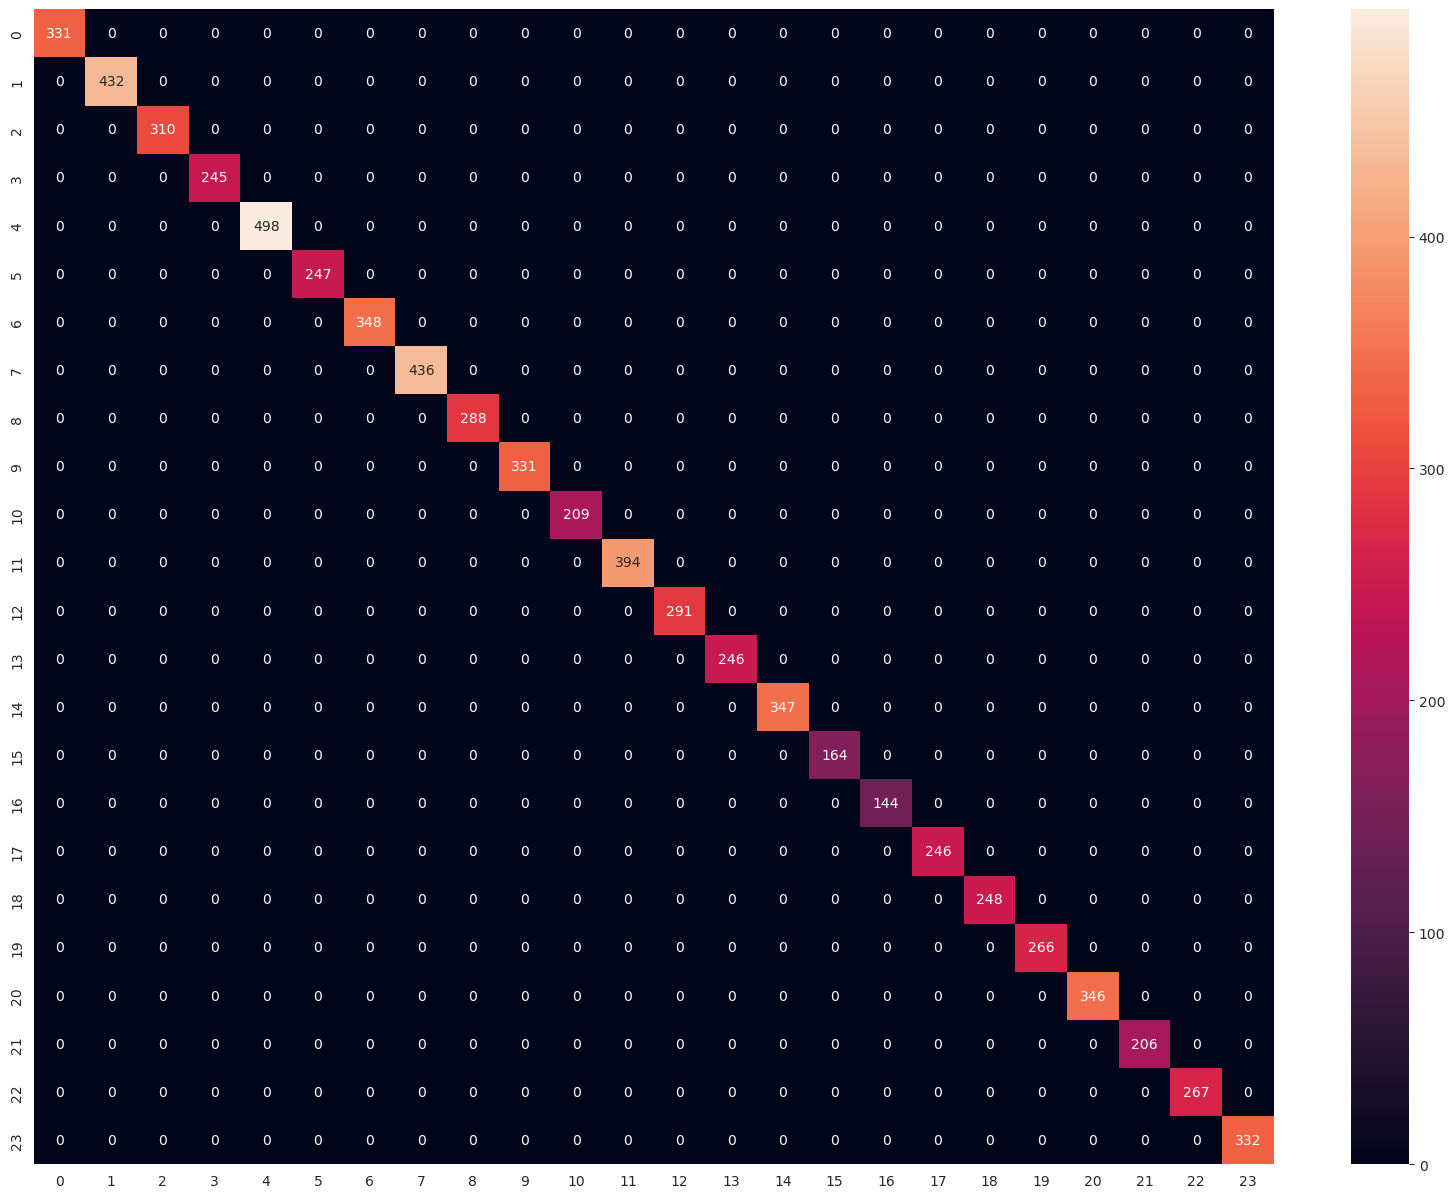

In [49]:
plt.figure(figsize=(20,15))

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

- we reached 100% accuracy on test data 
- wait for next version with deployment